# Project 2 : Working With Web Data
## Author : Manoj Kumar Singade

# Task 1: XML Sitemap Parsing for Khan Academy

This notebook demonstrates the use of the `XMLSitemapExtractor` class for extracting and parsing XML sitemaps from the Khan Academy website. The aim is to retrieve structured URL data from the site's sitemaps and explore potential applications of this data.


## Importing the XMLSitemapExtractor

First, we import the `XMLSitemapExtractor` class from our custom Python module.


In [ ]:
from src.web_data.sitemapParser import XMLSitemapExtractor


## Initializing the Sitemap Extractor

We will initialize the extractor with Khan Academy's website URL to begin extracting sitemaps.


In [ ]:
# Replace with the actual website URL you are targeting
website_url = "https://www.khanacademy.org"
sitemap_extractor = XMLSitemapExtractor(website_url)


## Processing and Parsing Sitemaps

The extractor processes all sitemaps found in the website's `robots.txt` file. It retrieves each sitemap and parses the contained URLs.


In [ ]:
sitemap_extractor.process_all_sitemaps()


## Saving the Extracted Data

The parsed data from each sitemap is saved as a separate CSV file for easy access and analysis.


In [ ]:
# Save the parsed data into CSV files
sitemap_extractor.save_to_csv()


## Reviewing a Sample of the Extracted Data

Let's load and review a portion of the extracted data to understand its structure and contents.


In [ ]:
import pandas as pd

# Example of loading one of the saved CSV files
sample_csv_path = 'sitemap.csv'
sample_dataframe = pd.read_csv(sample_csv_path)

# Display the first few rows of the DataFrame
sample_dataframe.head()


,ExtractedURLs,Subdir_1,Subdir_2,Subdir_3,Subdir_4,Subdir_5,Subdir_6
0,https://www.khanacademy.org/sitemaps/kmap/meas...,sitemaps,kmap,measurement-and-data-d,sitemap.xml,NaN,NaN
1,https://www.khanacademy.org/sitemaps/humanitie...,sitemaps,humanities,whp-1750,sitemap.xml,NaN,NaN
2,https://www.khanacademy.org/sitemaps/ela/cc-4t...,sitemaps,ela,cc-4th-reading-vocab,sitemap.xml,NaN,NaN
3,https://www.khanacademy.org/sitemaps/science/i...,sitemaps,science,inorganic-chemistry-essentials-class-12,sitemap.xml,NaN,NaN
4,https://www.khanacademy.org/sitemaps/math/arit...,sitemaps,math,arithmetic,sitemap.xml,NaN,NaN


# Dataset Description and Potential Uses

## Dataset Description

The dataset obtained from Khan Academy's XML sitemaps includes the following columns:

- **ExtractedURLs**: Full URLs extracted from the sitemaps, representing specific pages or resources on the Khan Academy website.
- **Subdir_1 to Subdir_6**: Hierarchical structure of the URLs. Each column represents a level in the website's directory path, with `Subdir_1` being the top level. 'NaN' values indicate the absence of further subdirectories at that level.

## Potential Uses of the Dataset

1. **Content Analysis and Categorization**: 
   - Analyze and categorize the educational content offered by Khan Academy.
   - Useful for understanding the range and organization of their educational materials.

2. **SEO and Web Structure Analysis**: 
   - Utilize the dataset to analyze the website's structure for SEO strategy planning.
   - Helpful in ensuring that important pages are correctly listed in the sitemaps.

3. **Automated Link Checking**: 
   - Use the dataset for automated checks for broken links or sitemap consistency.

4. **Educational Research**: 
   - Facilitate research in online education by studying the breadth and organization of subjects and courses.
   - Correlate the website's structure with user engagement or academic outcomes.

5. **Navigation and User Experience Analysis**: 
   - Analyze how content is structured and navigated to gain insights into user journey mapping on the website.

## Next Steps

With this comprehensive dataset, further analysis can be conducted, such as visualizing the distribution of content across different subjects or analyzing the depth of content hierarchy. This can be augmented with additional data sources for more insightful analysis.


#### We successfully utilized the `XMLSitemapExtractor` class to extract and parse XML sitemaps from the Khan Academy website. This process yielded a structured dataset comprising the URLs of various educational resources and content pages, categorized into hierarchical subdirectories.

### Key Achievements:
- **Structured Data Extraction**: We effectively transformed the XML sitemap data into a structured pandas DataFrame, making it easier to analyze and manipulate.
- **Insight into Website Organization**: The dataset provided a clear view of Khan Academy's website structure, revealing how educational content is organized and presented.

### Future Directions:
- **Deeper Content Analysis**: The extracted data opens avenues for a more detailed analysis of the content distribution across different educational subjects and categories.
- **Enhanced SEO and UX Strategies**: The insights gained from this dataset can inform SEO optimization and user experience improvements for similar educational platforms.
- **Application in Educational Research**: This dataset can be a valuable asset in educational research, particularly in studying online learning platforms' content organization and accessibility.

Overall, the extraction and parsing of Khan Academy's XML sitemaps have demonstrated a practical application of web scraping techniques, showcasing their potential in extracting valuable data from web resources.


# Task 2- Fetching Air Quality Data Using OpenAQ API

This notebook demonstrates the process of fetching air quality data using the OpenAQ API. We use the `OpenAQDataFetcher` class to retrieve and structure the data into a pandas DataFrame.


## Importing the OpenAQDataFetcher

We start by importing the `OpenAQDataFetcher` class which is used to interact with the OpenAQ API.


In [ ]:
from src.my_package.openaq_data_fetcher import OpenAQDataFetcher


## Setting Up API Request

Define the API endpoint, headers, and other parameters for fetching the air quality data.


In [ ]:
import os
import requests

# Load API key from environment variable
api_key = os.environ.get('YOUR_API_KEY')

# Ensure that the API key is available
if not api_key:
    raise ValueError("API key not found. Set the YOUR_API_KEY environment variable.")

url = "https://api.openaq.org/v2/measurements?date_from=2000-01-01T00%3A00%3A00Z&date_to=2023-10-03T18%3A14%3A00Z&limit=30000&page=1&offset=0&sort=desc&radius=1000&order_by=datetime"
headers = {
    "X-API-Key": api_key,
    'accept': 'application/json',
    'content-type': 'application/json',
}

# Make the request
response = requests.get(url, headers=headers)

# Handle the response as needed
print(response.json())


: 

## Fetching Data from the API

Using the `OpenAQDataFetcher`, we fetch air quality data and load it into a pandas DataFrame for analysis.


In [ ]:
import pandas as pd
data_fetcher = OpenAQDataFetcher(url, headers)
data = data_fetcher.fetch_data()
df = pd.DataFrame(data) if data else pd.DataFrame()


## Exploring the Dataset

The dataset contains various columns providing detailed information on air quality measurements:

- **locationId**: Unique identifier for the measurement location.
- **location**: Name or description of the measurement location.
- **parameter**: Type of pollutant measured (e.g., PM2.5, NO2).
- **value**: Measurement value of the pollutant.
- **date**: Timestamps of the measurement in UTC and local time.
- **unit**: Measurement unit of the pollutant value.
- **coordinates**: Geographic coordinates of the measurement location.
- **country**: Country code where the measurement is taken.
- **city**: City name associated with the measurement.
- **isMobile**: Indicates whether the measurement is from a mobile source.
- **entity**: The entity responsible for the measurement.
- **sensorType**: Type of sensor used for the measurement.


## Displaying Sample Data

Let's display the first few rows of the dataset to get a glimpse of the data structure.


In [ ]:
df.head()


,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,1638531,N/A,pm25,11.100000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 32.552794, 'longitude': -117.047286}",US,None,False,None,Governmental Organization,low-cost sensor
1,1477633,Oroville Mobile,pm25,1.400000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 48.93829, 'longitude': -119.43797}",US,None,False,None,Governmental Organization,low-cost sensor
2,1461244,Moorestown-Map,temperature,24.149587,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",c,"{'latitude': 39.962521, 'longitude': -74.949837}",US,None,False,None,Governmental Organization,low-cost sensor
3,1377907,Columbus Baker Stree,pm10,24.000000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 32.4274, 'longitude': -84.9457}",US,None,False,None,Governmental Organization,low-cost sensor
4,1371119,"CAP - Prince's Grant, KZN, ZA.",temperature,24.332639,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",c,"{'latitude': -29.339544, 'longitude': 31.374692}",ZA,None,False,None,Governmental Organization,low-cost sensor


## Potential Uses of the Dataset

1. **Environmental Analysis**: Investigate air quality trends in different regions and their impact on environmental health.
2. **Public Health Research**: Correlate air quality data with public health issues, such as respiratory diseases.
3. **Policy Making**: Inform policy decisions related to environmental protection and air quality standards.
4. **Educational Purposes**: Utilize the dataset for educational and awareness programs about air pollution.


## Saving the Data to CSV

After fetching and processing the air quality data, it's a good practice to save the data to a CSV file. This allows for easier access and analysis in the future, without the need to refetch the data from the API.


In [ ]:
# Specify the filename
csv_filename = 'air_quality_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_filename, index=False)

print(f"Data successfully saved to {csv_filename}")


Data successfully saved to air_quality_data.csv


# Task 3- Theatre Information Scraping Using BeautifulSoup

This notebook outlines the process of scraping theatre information from 'https://www.cinemaprofile.com' using the `TheatreScraper` class. The goal is to extract detailed data about theatres, including their names, locations, and other relevant information.


## Importing the TheatreScraper

We begin by importing the `TheatreScraper` class, which encapsulates the logic for web scraping.


In [ ]:
from src.web_data.theatre_scraper import TheatreScraper


## Initializing the Theatre Scraper

Initialize the scraper with the base URL of the website from which we want to scrape theatre information.


In [ ]:
base_url = 'https://www.cinemaprofile.com/theatre/'
scraper = TheatreScraper(base_url)


## Scraping Theatre Information

Using the scraper, we'll extract information about various theatres listed on the site.


In [ ]:
theatre_data = scraper.scrape_theatres()


## Displaying Extracted Data

Let's examine the first few rows of our scraped data to get an idea of its structure and the type of information extracted.


In [ ]:
theatre_data.head()


,Name,City,State,Details URL
0,A Plex Ashoka Theatre,Hanamkonda,Telangana,https://www.cinemaprofile.com/theatre/view-a-p...
1,A World Multiplex Theatre,Botad,Gujarat,https://www.cinemaprofile.com/theatre/view-a-w...
2,A1 Studio Theatre,Mumbai,Maharashtra,https://www.cinemaprofile.com/theatre/view-a1-...
3,A1 Theatre,Karur,Tamil Nadu,https://www.cinemaprofile.com/theatre/view-a1-...
4,Aakriti Cinema Theatre,Rewa,Madhya Pradesh,https://www.cinemaprofile.com/theatre/view-aak...


## Dataset Description

The dataset includes the following columns:

- **Name**: The name of the theatre.
- **City**: The city where the theatre is located.
- **State**: The state or region where the theatre is located.
- **Details URL**: A URL for more information about each theatre.

This dataset provides a comprehensive overview of theatre locations and basic details.


## Potential Uses of the Dataset

1. **Cultural Analytics**: Analyzing the distribution of theatres to study cultural accessibility and trends.
2. **Business Intelligence**: For businesses in the entertainment sector to identify potential locations for events or partnerships.
3. **Urban Planning and Research**: Understanding the cultural infrastructure of different regions.
4. **Tourism and Leisure Industry**: For creating guides and resources related to theatre arts and entertainment.


## Saving the Data to CSV

The scraped data can be saved as a CSV file for offline analysis and record-keeping.


In [ ]:
filename = 'theatre_data.csv'
scraper.save_to_csv(theatre_data, filename)


# Task - 4 Analysis of Air Quality Data

In this notebook, we will analyze the air quality data obtained from the OpenAQ API. We aim to uncover insights into air pollution levels across different regions and over time, and understand the potential impact on public health and environmental quality.


## Loading the Dataset and Libraries 

We start by loading the air quality data into a DataFrame for analysi and Importing Libraries for our analysis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast


# Load the dataset 
df = pd.read_csv('air_quality_data.csv')


## Data Cleaning and Preparation

Before analysis, we clean and prepare the data by handling missing values, parsing dates, and potentially transforming or creating new variables for better insights.

We prepare the data by parsing the 'date' field and handling missing values.


In [ ]:
# Helper function to parse the 'date' field
def parse_date(date_str):
    try:
        date_dict = ast.literal_eval(date_str)
        return date_dict['utc']
    except:
        return None

# Apply the function to the 'date' column
df['date'] = df['date'].apply(parse_date)

# Convert 'date' from string to datetime object
df['date'] = pd.to_datetime(df['date'])

# Dropping rows with missing values in 'value' column
df.dropna(subset=['value'], inplace=True)


## Summary Statistics for Major Pollutants

We examine the distribution of major pollutants in the dataset.


In [ ]:
# Summary statistics for major pollutants
major_pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co', 'o3']
pollutant_df = df[df['parameter'].isin(major_pollutants)]
summary_stats = pollutant_df.groupby('parameter')['value'].describe()
summary_stats


,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
co,102.0,33.926408,161.245640,0.000,0.200000,0.200000,0.300000,1330.000000
no2,623.0,-2.136921,56.758618,-995.000,0.003000,0.005000,0.008000,88.700000
o3,66.0,9.772078,25.407541,0.001,0.045250,0.055000,0.063000,104.000000
pm10,1901.0,13.836330,88.880406,0.000,3.034483,7.675862,13.011538,3327.856667
pm25,2538.0,10.892611,78.855214,-999.000,3.187500,7.070135,11.183621,3327.856667
so2,326.0,0.347208,2.782938,0.000,0.000000,0.000000,0.001000,41.600000


## Additional Analysis

### Exploring Extreme Values
The extreme values in pollutants like CO, PM10, and PM2.5 need further investigation to identify anomalies or environmental events.

### Data Quality Checks
Negative values in NO2 suggest potential issues with data quality.

### Time Series Analysis
Analyzing pollutant levels over time could reveal important trends and seasonal patterns.

### Geographical Analysis
Investigating data by country or region might provide insights into geographical variations in air quality.

### Impact of Data Source
Comparing data from different sources (governmental vs. community organizations) could highlight monitoring differences.


## Visualizing Air Pollutant Levels Over Time

We create visualizations to observe trends in the concentration of various air pollutants.


C:\Users\Asus\AppData\Local\Temp\ipykernel_17784\571420968.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_df, x='date', y='value', hue='parameter', ci=None)


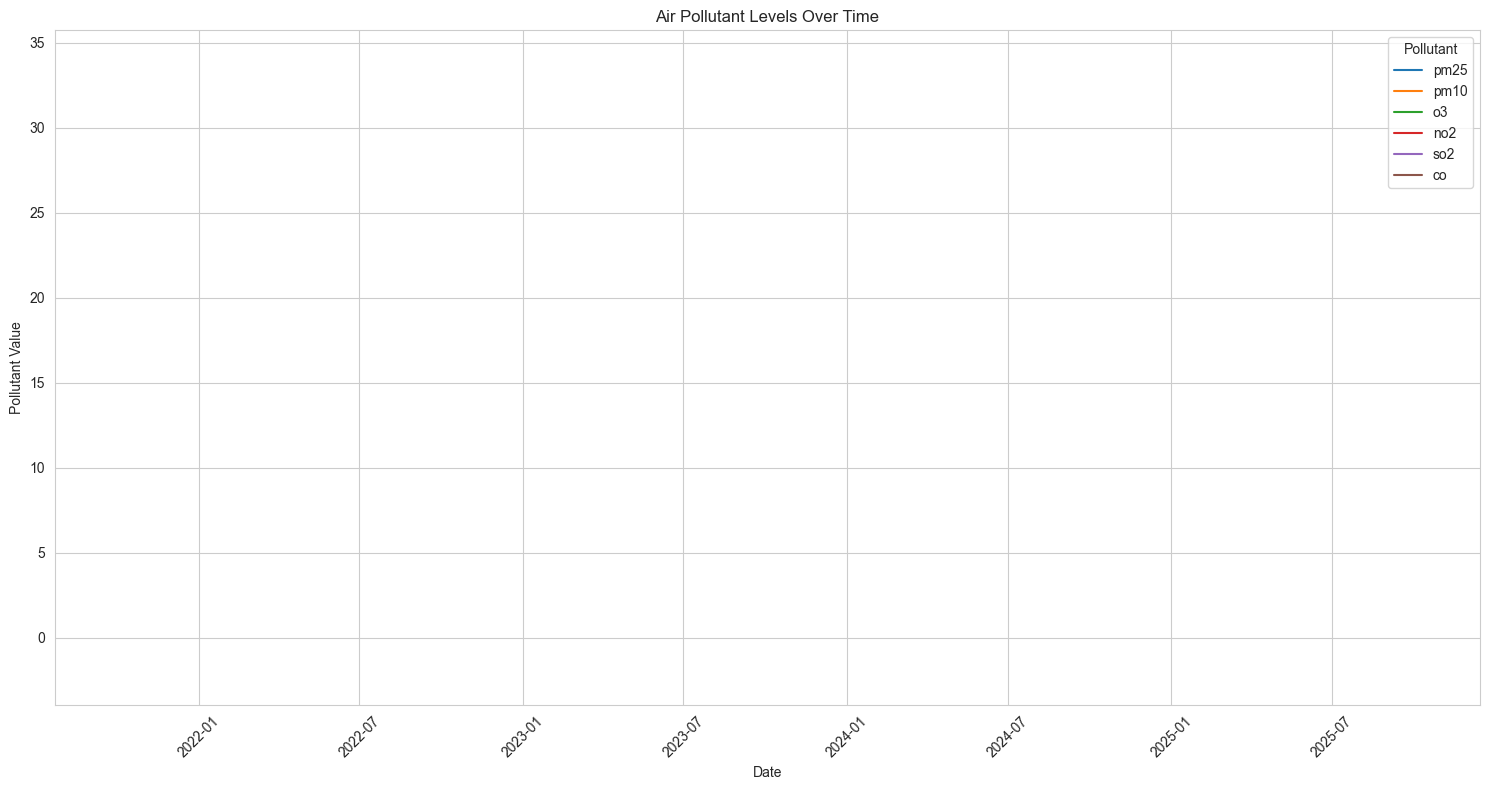

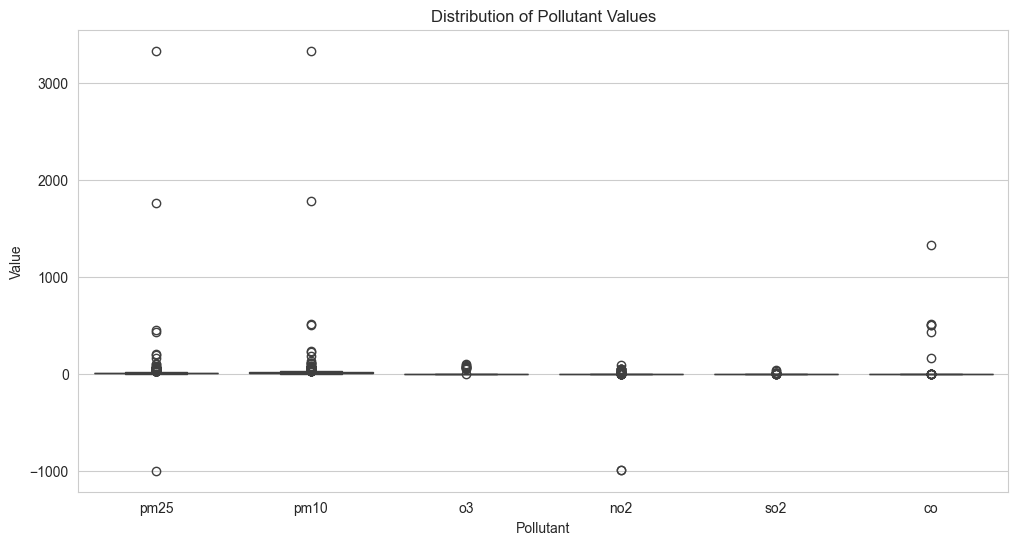

In [ ]:
# Setting the visual style for the plots
sns.set_style("whitegrid")

# Filtering out the major pollutants for visualization
major_pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co', 'o3']
filtered_df = df[df['parameter'].isin(major_pollutants)]

# Line plot for pollutant levels over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=filtered_df, x='date', y='value', hue='parameter', ci=None)
plt.title('Air Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Value')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

# Boxplot for distribution of pollutant values
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='parameter', y='value')
plt.title('Distribution of Pollutant Values')
plt.xlabel('Pollutant')
plt.ylabel('Value')
plt.show()


## Analysis and Insights

Based on the visualizations and data analysis, we derive the following insights:

1. **Seasonal and Temporal Trends**: Identify any seasonal or temporal patterns in air pollutant levels.
2. **Comparative Pollutant Analysis**: Assess which pollutants have higher concentrations and variability.
3. **Geographical and Environmental Implications**: If location data is available, analyze geographical variations and potential environmental impacts.


# Conclusion

This notebook provided an overview of fetching and analyzing air quality data from the OpenAQ API. The dataset offers valuable insights into global air quality, which can be leveraged for various research and policy-making purposes.

The `TheatreScraper` class effectively scraped comprehensive theatre information from the specified website. This dataset is valuable for various analytical and research purposes in the fields of culture, entertainment, and urban studies.

The analysis of the OpenAQ air quality data reveals important trends and characteristics of air pollutants. These insights are crucial for environmental monitoring and public health policy-making. Further analysis could include geographical comparisons, correlation with external factors, and assessment against air quality standards.

This analysis of the OpenAQ air quality data has revealed significant insights into global pollution levels and data quality concerns. Further detailed temporal and geographical analysis could enhance our understanding of global air quality patterns and their impact on public health and environmental policy.


## References 


- BeautifulSoup Documentation: https://beautiful-soup-4.readthedocs.io/en/latest/

- Pandas Documentation:
 
- https://pandas.pydata.org/docs/

- Seaborn Documentation:
 
- https://seaborn.pydata.org/

- Matplotlib Documentation: https://matplotlib.org/stable/index.html

- Requests Library Documentation: https://requests.readthedocs.io/


- Task 1 - https://www.khanacademy.org/

- Task 2 - https://api.openaq.org/v2

- Task 3 - https://www.cinemaprofile.com/theatre/theatres-list-in-india.html 


